In [34]:
from tenLoader import TenRawset, TenVideoInfer
from model import FeatupExtra
from ModelInfer import ModelInfer
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import PIL.Image as Image
import numpy as np
from preprocess_utensils import get_gray_image, get_boundary_iou
import json
from loss import order_loss, chamer_distance_loss
import random

In [52]:
model_name = "featConv_10"

loss_log_path = f"./log/{model_name}_loss.json"
iou_log_path = f"./log/{model_name}_iou.json"
test_iou_log_path = f"./log/{model_name}_test_iou.json"
model_path = f"./model/{model_name}.pth"
best_model_path = f"./model/{model_name}_best.pth"
log_path = f"./log/{model_name}.log"

another_model_name = "DETR_circle_no_noi"
another_loss_log_path = f"./log/{another_model_name}_loss.json"
another_iou_log_path = f"./log/{another_model_name}_iou.json"

In [53]:
with open(loss_log_path, "r") as f:
    dict_loss = json.load(f)
with open(iou_log_path, "r") as f:
    dict_iou = json.load(f)
with open(test_iou_log_path, "r") as f:
    dict_test_iou = json.load(f)

with open(another_loss_log_path, "r") as f:
    another_dict_loss = json.load(f)
with open(another_iou_log_path, "r") as f:
    another_dict_iou = json.load(f)

In [54]:
numeric_dict_loss = {}
for key, value in dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
numeric_dict_test_iou = {}
for key, value in dict_test_iou.items():
    numeric_dict_test_iou[int(key)] = float(value)
dict_loss = numeric_dict_loss
dict_iou = numeric_dict_iou
dict_test_iou = numeric_dict_test_iou

In [55]:
numeric_dict_loss = {}
for key, value in another_dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in another_dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
another_dict_loss = numeric_dict_loss
another_dict_iou = numeric_dict_iou

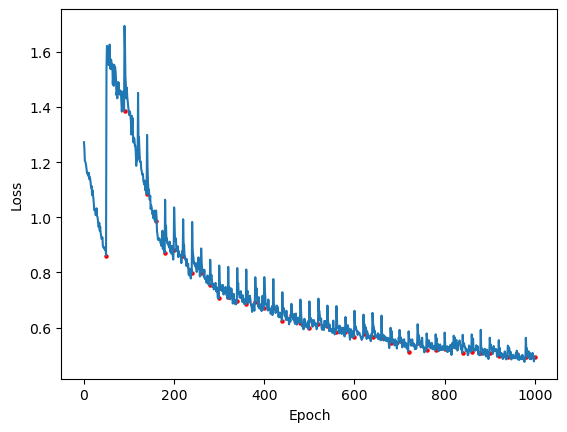

In [48]:
# plot the loss
plt.plot(
    list(dict_loss.keys()),
    list(dict_loss.values()),
    label="With Noise",
)
# plt.plot(
#     list(another_dict_loss.keys()),
#     list(another_dict_loss.values()),
#     label="Without Noise",
# )
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plot the update points
plt.scatter(
    list(dict_iou.keys()),
    [dict_loss[i - 1] for i in list(dict_iou.keys())],
    c="r",
    s=5,
)
# plt.legend()
plt.show()

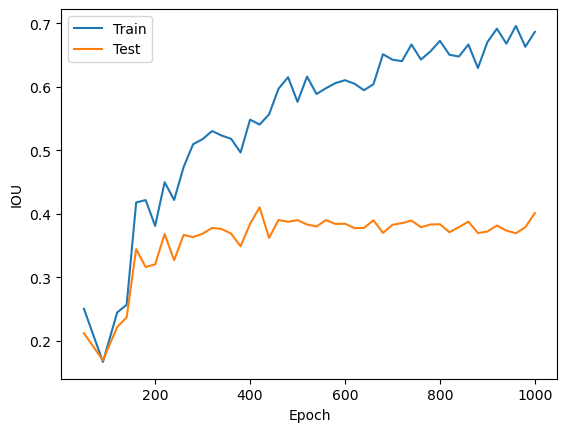

In [49]:
# plot the iou
plt.plot(
    list(dict_iou.keys()),
    list(dict_iou.values()),
    label="Train",
)
plt.plot(
    list(dict_test_iou.keys()),
    list(dict_test_iou.values()),
    label="Test",
)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("IOU")
plt.show()

In [56]:
# get the last iou
list(dict_test_iou.values())[-1], list(dict_iou.values())[-1]


(0.297594749331569, 0.7971559891404097)

In [57]:
# get the highest test iou
highest_test_iou = max(dict_test_iou.values())
print(highest_test_iou)

0.3286994972322343


In [35]:
# load the model
model = model = FeatupExtra(
    nn.Sequential(
        nn.Conv2d(
            in_channels=384,
            out_channels=384,
            kernel_size=3,
            padding=1,
            stride=1,
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=384,
            out_channels=384,
            kernel_size=3,
            padding=1,
            stride=1,
        ),
        nn.ReLU(),
    )
).cuda()
model.load_state_dict(torch.load(best_model_path))

Using cache found in /zhome/32/f/202284/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /zhome/32/f/202284/.cache/torch/hub/facebookresearch_dino_main
/work3/s232248/miniconda3/envs/ras/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


<All keys matched successfully>

In [36]:
raw_set = TenRawset(False)
model_infer = TenVideoInfer(raw_set)

In [37]:
model_infer.infer_model(model, 0)

In [38]:
model_infer.get_total_iou().item()

0.32869952917099

IoU: 0.4156481623649597


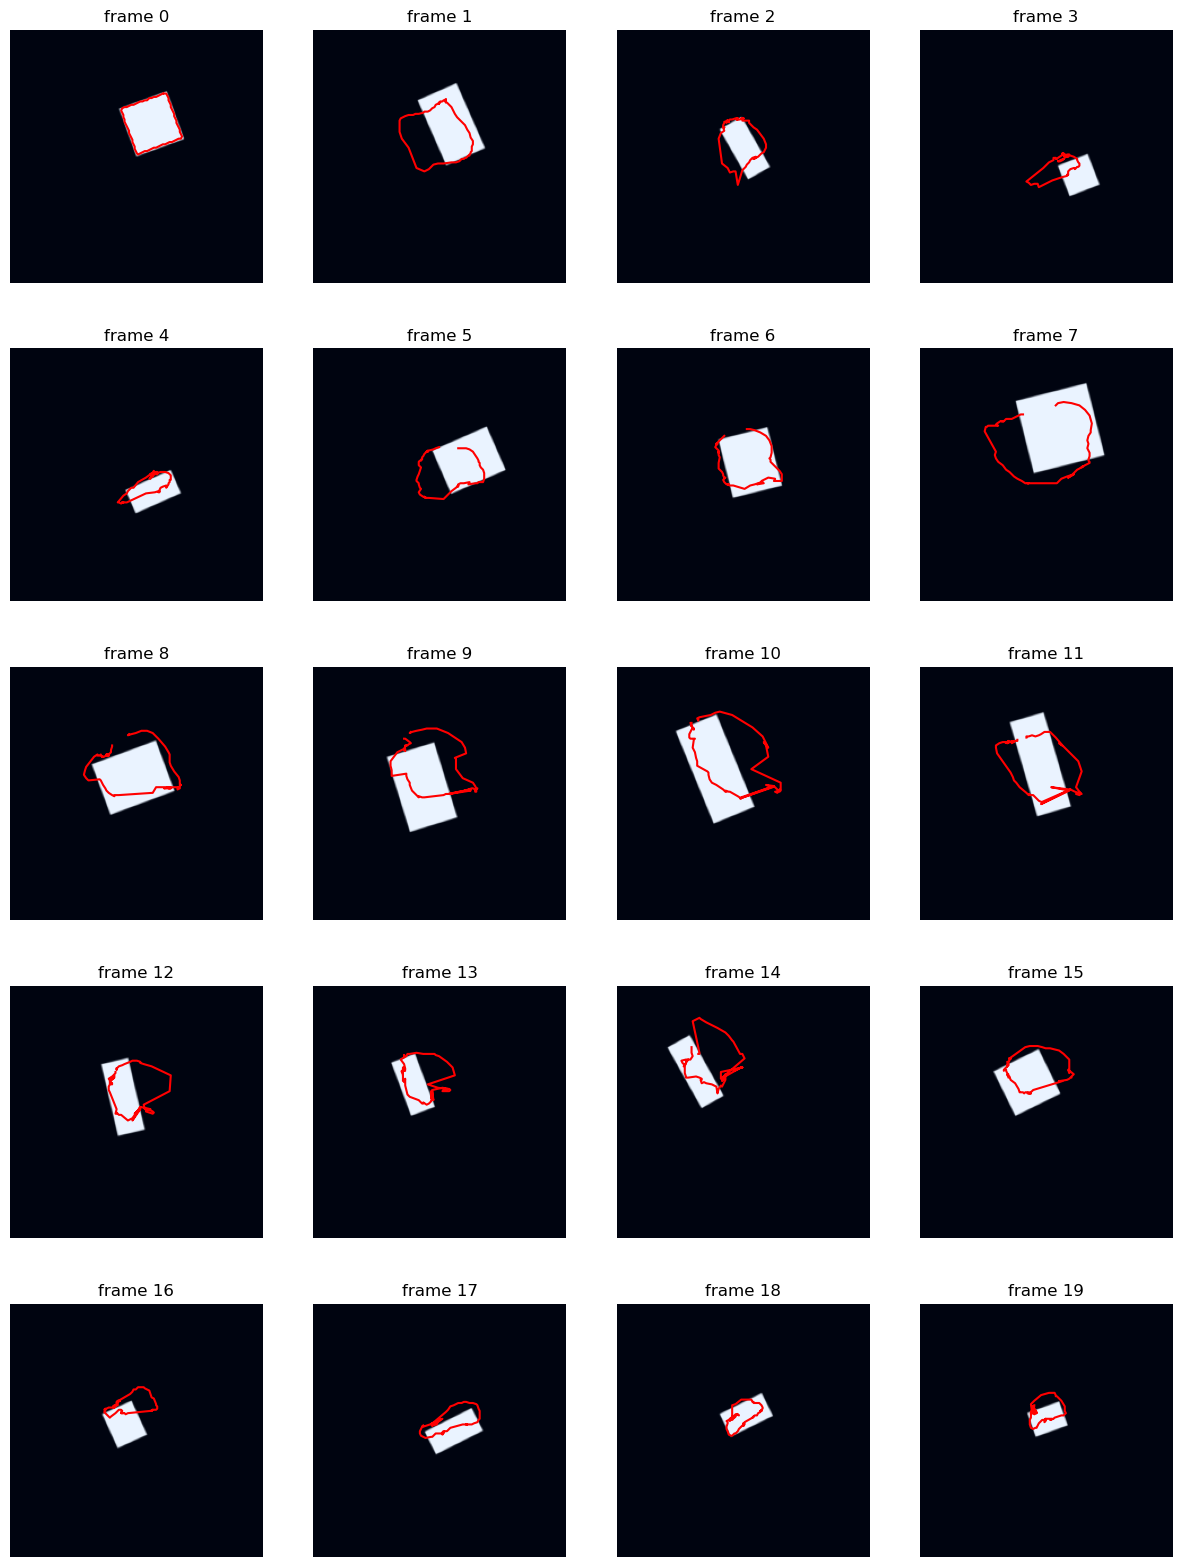

In [43]:
# video_idx = 0
# video_idx = 3
# video_idx = 5
video_idx = 6
model_infer.show_infer_result(video_idx, 0)
print(f"IoU: {model_infer.get_video_iou(video_idx)}")